# Computer Vision: Assignment 3 Part 1 - Some CNN Basics [50%]

Spring 2022 semester.

Due date: **July 1st 2022.**

## Introduction

This question is an introduction to using PyTorch for training simple neural net models. 

Two different datasets will be used: 
- MNIST digits [handwritten digits]
- CIFAR-10 [32x32 resolution color images of 10 object classes].

## Requirements

Perform this assignment in PyTorch, modifying the baseline code, producing outputs and adding required explanations - *all within this ipython notebook*.

Finally, submit this iPython notebook, including outputs, as an .ipynb file. 

## Question (1): Warmup [5%]

It is always good practice to visually inspect your data before trying to train a model, since it lets you check for problems and get a feel for the task at hand.

MNIST is a dataset of 70,000 grayscale hand-written digits (0 through 9).
60,000 of these are training images. 10,000 are a held out test set. 

CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). 
The train/test split is 50k/10k.

**a)**  Use `matplotlib` and ipython notebook's visualization capabilities to display the average train and average test image of each class, for each of the two datasets.
[See this PyTorch tutorial page](http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py) for hints on how to achieve this.

## Question (2): Training a Single Layer Network on MNIST [10%]

Start by running the training on MNIST. By default if you run this notebook successfully, it will train on MNIST.

This will initialize a single layer model train it on the 60,000 MNIST training images for 10 epochs (passes through the training data). 

The cross-entropy loss function computes a Logarithm of the Softmax on the output of the neural network, and then computes the negative log-likelihood w.r.t. the given target.

The default values for the learning rate, batch size and number of epochs are given in the "options" cell of this notebook. Unless otherwise specified, use the default values throughout this assignment. 

Note the decrease in training loss and corresponding decrease in validation errors.

**a)** Add code to plot out the network weights as images (one for each class, of size 28 by 28) after the last epoch. (Hint thread: [#1](https://discuss.pytorch.org/t/understanding-deep-network-visualize-weights/2060/2?u=smth) )

**b)** Reduce the number of training examples to just 50. [Hint: limit the iterator in the `train` function]. 
Paste the output into your report and explain what is happening to the model.

## Question (3): Training a Multi-Layer Network on MNIST [10%]

**a)**  Add an extra layer to the network with 1000 hidden units and a `tanh` non-linearity. [Hint: modify the `Net` class].

**b)**   Now retrain the model for 10 epochs with each of the learning rates in the set {0.01, 0.1, 1, 10} and test the resulting model. Create a figure and plot the loss curves of each of the four runs for comparison. Explain the obtained (train and test) results.

## Question (4): Training a Convolutional Network on CIFAR [15%]

To change over to the CIFAR-10 dataset, change the `options` cell's `dataset` variable to `'cifar10'`.

- Create a convolutional network with the following architecture:
  - Convolution with 5 by 5 filters, stride 2, 16 feature maps + Tanh nonlinearity.
  - Convolution with 3 by 3 filters, (stride 1), 64 feature maps + Tanh nonlinearity.
  - Convolution with 3 by 3 filters, (stride 1), 64 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Flatten to vector.
  - Linear layer with 64 hidden units + Tanh nonlinearity.
  - Linear layer to 10 output units.

**a)** Train it for 20 epochs on CIFAR-10 and plot the training loss curve (avg. loss per epoch) and final test loss and accuracy, when training with or without the two 3x3 convolutional layers. 

**b)**  Give a breakdown of the number of parameters (per layer) within the above model, as well as the overall number.

# **Answer (1):**
create needed blocks of code (and results) below

In [1]:
# imports
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import torchvision.models as models

import torchvision
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def imshow(img1, img2, dataset, label):
    img1 = img1 / 2 + 0.5  # un-normalize
    img2 = img2 / 2 + 0.5
    np_img1, np_img2 = img1.numpy(), img2.numpy()

    plt.figure()
    plt.suptitle(dataset + " dataset average: Class " + label)
    plt.subplot(1, 2, 1)
    plt.imshow(np.transpose(np_img1, (1, 2, 0)))
    plt.title('Train')
    plt.subplot(1, 2, 2)
    plt.imshow(np.transpose(np_img2, (1, 2, 0)))
    plt.title('Test')
    plt.show()

In [3]:
def show_average_images(train_loader, test_loader, dataset, labels):
    
    train_counters, test_counters = [], []
    train_results, test_results = [], []
    
    for _ in range(len(labels)):
        train_counters.append(0)
        test_counters.append(0)
        train_results.append(None)
        test_results.append(None)
    
    dataiter = iter(train_loader)
    
    while True:
        try:
            img_temp, label_temp = dataiter.next()
            
            for ind in range(len(labels)):
                if str(label_temp) == 'tensor([' + str(ind) + '])':
                    train_counters[ind] += 1
                    if train_results[ind] is None:
                        train_results[ind] = img_temp
                    else:
                        train_results[ind] += img_temp

        except StopIteration:
            break

    dataiter = iter(test_loader)
    
    while True:
        try:
            img_temp, label_temp = dataiter.next()
            
            for ind in range(len(labels)):
                if str(label_temp) == 'tensor([' + str(ind) + '])':
                    test_counters[ind] += 1
                    if test_results[ind] is None:
                        test_results[ind] = img_temp
                    else:
                        test_results[ind] += img_temp

        except StopIteration:
            break
        
    for index, label in enumerate(labels):
        
        test_results[index] /= test_counters[index]
        train_results[index] /= train_counters[index]

        imshow(torchvision.utils.make_grid(train_results[index]), torchvision.utils.make_grid(test_results[index]), 
               dataset, labels[index])

Files already downloaded and verified
Files already downloaded and verified


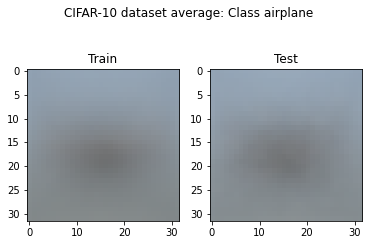

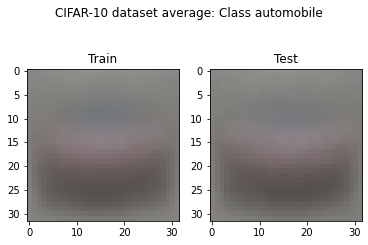

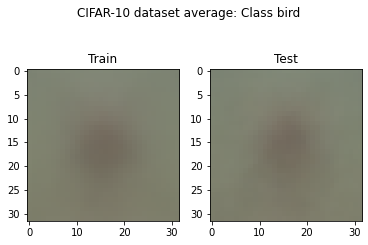

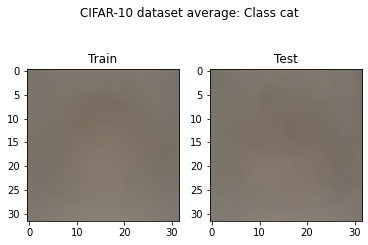

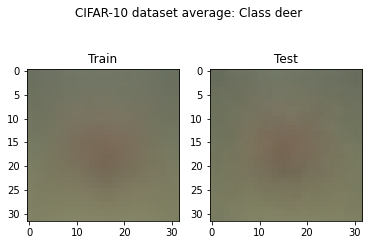

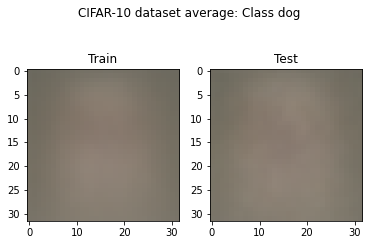

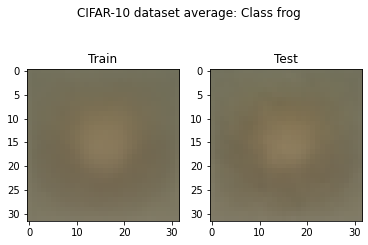

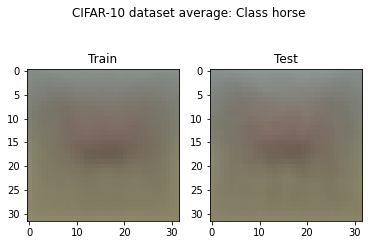

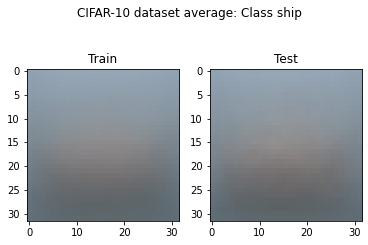

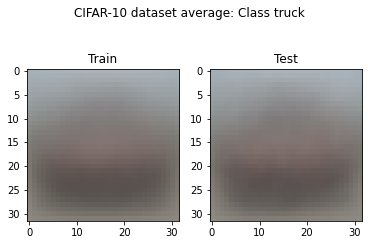

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


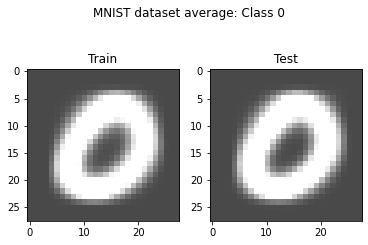

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


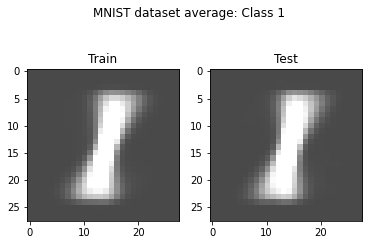

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


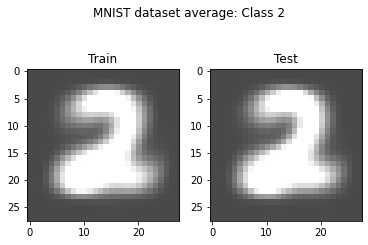

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


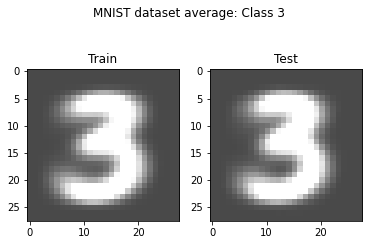

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


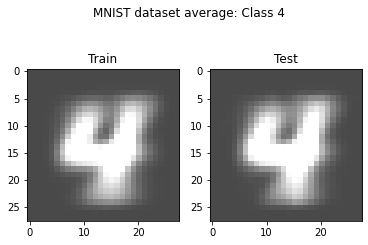

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


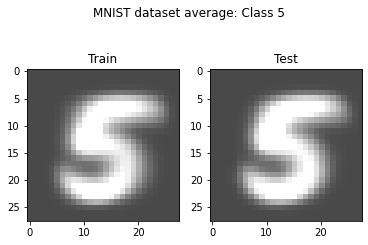

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


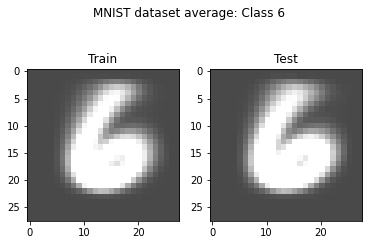

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


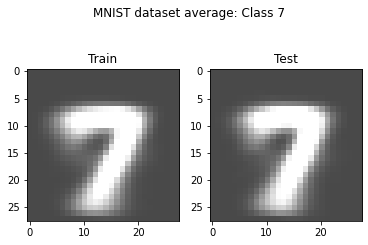

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


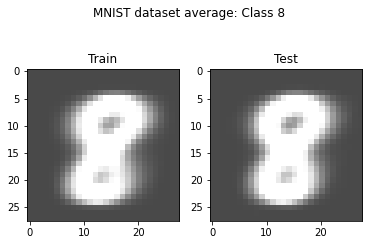

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


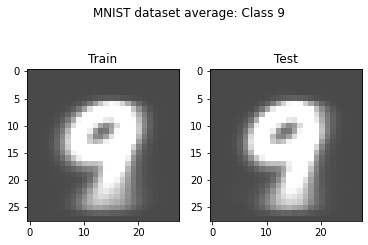

In [4]:
torch.utils.data.DataLoader.num_worker = 0

cifar_transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

mnist_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))])

cifar_train = torchvision.datasets.CIFAR10(root='.', train=True,
                                           download=True, transform=cifar_transform)

cifar_train_loader = torch.utils.data.DataLoader(cifar_train, batch_size=1,
                                                 shuffle=True, num_workers=2)

cifar_test = torchvision.datasets.CIFAR10(root='.', train=False,
                                          download=True, transform=cifar_transform)

cifar_test_loader = torch.utils.data.DataLoader(cifar_test, batch_size=1,
                                                shuffle=False, num_workers=2)

mnist_train = torchvision.datasets.MNIST(root='.', train=True,
                                         download=True, transform=mnist_transform)

mnist_train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=1,
                                                 shuffle=True, num_workers=2)

mnist_test = torchvision.datasets.MNIST(root='.', train=False,
                                        download=True, transform=mnist_transform)

mnist_test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=1,
                                                shuffle=False, num_workers=2)

cifar_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

show_average_images(cifar_train_loader, cifar_test_loader, 'CIFAR-10', cifar_labels)
show_average_images(mnist_train_loader, mnist_test_loader, 'MNIST', mnist_labels)

# **Answer (2):**
create needed blocks of code (and results) below

In [5]:
# options
dataset = 'mnist' # options: 'mnist' | 'cifar10'
batch_size = 64   # input batch size for training
epochs = 10       # number of epochs to train
lr = 0.01        # learning rate

In [6]:
## network and optimizer
if dataset == 'mnist':
    num_inputs = 784
elif dataset == 'cifar10':
    num_inputs = 3072

num_outputs = 10 # same for both CIFAR10 and MNIST, both have 10 classes as outputs

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        output = self.linear(input)
        return output

network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)

In [7]:
# train and test functions
def train(epoch, train_loader):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test(test_loader):
    test_loss_curve=[]
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        #data, target = Variable(data, volatile=True), Variable(target)
        output = network(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        test_loss_curve.append(F.cross_entropy(output, target, reduction='sum').item())
        #test_loss += F.cross_entropy(output, target, sum=True).item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    return test_loss_curve

In [8]:
# Training and testing 
for i in range(1, epochs+1):
  train(i, mnist_train_loader)

# resetting the value of batch size in the DataLoader objects
cifar_train_loader = torch.utils.data.DataLoader(cifar_train, batch_size=batch_size,
                                                 shuffle=True, num_workers=2)

cifar_test_loader = torch.utils.data.DataLoader(cifar_test, batch_size=batch_size,
                                                shuffle=False, num_workers=2)

mnist_train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size,
                                                 shuffle=True, num_workers=2)

mnist_test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size,
                                                shuffle=False, num_workers=2)

test(mnist_test_loader)

Train Epoch: 1 [0/60000 (0%)]	Loss: 1.769039
Train Epoch: 1 [100/60000 (0%)]	Loss: 2.946988
Train Epoch: 1 [200/60000 (0%)]	Loss: 0.095830
Train Epoch: 1 [300/60000 (0%)]	Loss: 0.403187
Train Epoch: 1 [400/60000 (1%)]	Loss: 0.060971
Train Epoch: 1 [500/60000 (1%)]	Loss: 0.692041
Train Epoch: 1 [600/60000 (1%)]	Loss: 0.006147
Train Epoch: 1 [700/60000 (1%)]	Loss: 0.004543
Train Epoch: 1 [800/60000 (1%)]	Loss: 0.001851
Train Epoch: 1 [900/60000 (2%)]	Loss: 0.000870
Train Epoch: 1 [1000/60000 (2%)]	Loss: 0.086923
Train Epoch: 1 [1100/60000 (2%)]	Loss: 0.000141
Train Epoch: 1 [1200/60000 (2%)]	Loss: 0.002401
Train Epoch: 1 [1300/60000 (2%)]	Loss: 5.262598
Train Epoch: 1 [1400/60000 (2%)]	Loss: 7.254366
Train Epoch: 1 [1500/60000 (2%)]	Loss: 0.000021
Train Epoch: 1 [1600/60000 (3%)]	Loss: 0.005124
Train Epoch: 1 [1700/60000 (3%)]	Loss: 0.000000
Train Epoch: 1 [1800/60000 (3%)]	Loss: 0.328355
Train Epoch: 1 [1900/60000 (3%)]	Loss: 0.001483
Train Epoch: 1 [2000/60000 (3%)]	Loss: 9.479364
Trai

Train Epoch: 1 [17000/60000 (28%)]	Loss: 0.948840
Train Epoch: 1 [17100/60000 (28%)]	Loss: 0.059873
Train Epoch: 1 [17200/60000 (29%)]	Loss: 6.824014
Train Epoch: 1 [17300/60000 (29%)]	Loss: 0.000891
Train Epoch: 1 [17400/60000 (29%)]	Loss: 0.614795
Train Epoch: 1 [17500/60000 (29%)]	Loss: 5.711168
Train Epoch: 1 [17600/60000 (29%)]	Loss: 8.287236
Train Epoch: 1 [17700/60000 (30%)]	Loss: 0.000000
Train Epoch: 1 [17800/60000 (30%)]	Loss: 0.754664
Train Epoch: 1 [17900/60000 (30%)]	Loss: 0.029702
Train Epoch: 1 [18000/60000 (30%)]	Loss: 0.000000
Train Epoch: 1 [18100/60000 (30%)]	Loss: 0.002714
Train Epoch: 1 [18200/60000 (30%)]	Loss: 0.009847
Train Epoch: 1 [18300/60000 (30%)]	Loss: 0.000223
Train Epoch: 1 [18400/60000 (31%)]	Loss: 0.013095
Train Epoch: 1 [18500/60000 (31%)]	Loss: 0.000000
Train Epoch: 1 [18600/60000 (31%)]	Loss: 2.082306
Train Epoch: 1 [18700/60000 (31%)]	Loss: 5.606102
Train Epoch: 1 [18800/60000 (31%)]	Loss: 0.014573
Train Epoch: 1 [18900/60000 (32%)]	Loss: 0.000469


Train Epoch: 1 [33700/60000 (56%)]	Loss: 0.024492
Train Epoch: 1 [33800/60000 (56%)]	Loss: 0.001376
Train Epoch: 1 [33900/60000 (56%)]	Loss: 0.001065
Train Epoch: 1 [34000/60000 (57%)]	Loss: 0.000000
Train Epoch: 1 [34100/60000 (57%)]	Loss: 0.000002
Train Epoch: 1 [34200/60000 (57%)]	Loss: 0.000000
Train Epoch: 1 [34300/60000 (57%)]	Loss: 0.000099
Train Epoch: 1 [34400/60000 (57%)]	Loss: 0.000209
Train Epoch: 1 [34500/60000 (58%)]	Loss: 0.000004
Train Epoch: 1 [34600/60000 (58%)]	Loss: 0.041476
Train Epoch: 1 [34700/60000 (58%)]	Loss: 13.023562
Train Epoch: 1 [34800/60000 (58%)]	Loss: 0.000194
Train Epoch: 1 [34900/60000 (58%)]	Loss: 0.000036
Train Epoch: 1 [35000/60000 (58%)]	Loss: 0.002166
Train Epoch: 1 [35100/60000 (58%)]	Loss: 0.006820
Train Epoch: 1 [35200/60000 (59%)]	Loss: 0.000000
Train Epoch: 1 [35300/60000 (59%)]	Loss: 0.000000
Train Epoch: 1 [35400/60000 (59%)]	Loss: 0.000065
Train Epoch: 1 [35500/60000 (59%)]	Loss: 0.000000
Train Epoch: 1 [35600/60000 (59%)]	Loss: 0.000076

Train Epoch: 1 [50300/60000 (84%)]	Loss: 7.693888
Train Epoch: 1 [50400/60000 (84%)]	Loss: 0.008868
Train Epoch: 1 [50500/60000 (84%)]	Loss: 0.000038
Train Epoch: 1 [50600/60000 (84%)]	Loss: 0.000294
Train Epoch: 1 [50700/60000 (84%)]	Loss: 0.000032
Train Epoch: 1 [50800/60000 (85%)]	Loss: 0.000000
Train Epoch: 1 [50900/60000 (85%)]	Loss: 0.000001
Train Epoch: 1 [51000/60000 (85%)]	Loss: 0.000000
Train Epoch: 1 [51100/60000 (85%)]	Loss: 0.068914
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.000002
Train Epoch: 1 [51300/60000 (86%)]	Loss: 0.000010
Train Epoch: 1 [51400/60000 (86%)]	Loss: 0.000076
Train Epoch: 1 [51500/60000 (86%)]	Loss: 5.700037
Train Epoch: 1 [51600/60000 (86%)]	Loss: 0.000002
Train Epoch: 1 [51700/60000 (86%)]	Loss: 0.000000
Train Epoch: 1 [51800/60000 (86%)]	Loss: 0.000138
Train Epoch: 1 [51900/60000 (86%)]	Loss: 0.000120
Train Epoch: 1 [52000/60000 (87%)]	Loss: 0.000000
Train Epoch: 1 [52100/60000 (87%)]	Loss: 0.000001
Train Epoch: 1 [52200/60000 (87%)]	Loss: 0.000284


Train Epoch: 2 [7000/60000 (12%)]	Loss: 0.000000
Train Epoch: 2 [7100/60000 (12%)]	Loss: 0.000588
Train Epoch: 2 [7200/60000 (12%)]	Loss: 0.000007
Train Epoch: 2 [7300/60000 (12%)]	Loss: 0.000000
Train Epoch: 2 [7400/60000 (12%)]	Loss: 4.056349
Train Epoch: 2 [7500/60000 (12%)]	Loss: 0.000015
Train Epoch: 2 [7600/60000 (13%)]	Loss: 0.000143
Train Epoch: 2 [7700/60000 (13%)]	Loss: 0.000168
Train Epoch: 2 [7800/60000 (13%)]	Loss: 10.340354
Train Epoch: 2 [7900/60000 (13%)]	Loss: 0.000000
Train Epoch: 2 [8000/60000 (13%)]	Loss: 0.000000
Train Epoch: 2 [8100/60000 (14%)]	Loss: 1.182572
Train Epoch: 2 [8200/60000 (14%)]	Loss: 0.000796
Train Epoch: 2 [8300/60000 (14%)]	Loss: 0.000122
Train Epoch: 2 [8400/60000 (14%)]	Loss: 0.000000
Train Epoch: 2 [8500/60000 (14%)]	Loss: 0.000041
Train Epoch: 2 [8600/60000 (14%)]	Loss: 0.000013
Train Epoch: 2 [8700/60000 (14%)]	Loss: 0.003710
Train Epoch: 2 [8800/60000 (15%)]	Loss: 1.034754
Train Epoch: 2 [8900/60000 (15%)]	Loss: 0.000014
Train Epoch: 2 [900

Train Epoch: 2 [23500/60000 (39%)]	Loss: 0.000000
Train Epoch: 2 [23600/60000 (39%)]	Loss: 0.000054
Train Epoch: 2 [23700/60000 (40%)]	Loss: 0.000011
Train Epoch: 2 [23800/60000 (40%)]	Loss: 0.000000
Train Epoch: 2 [23900/60000 (40%)]	Loss: 18.535147
Train Epoch: 2 [24000/60000 (40%)]	Loss: 0.000003
Train Epoch: 2 [24100/60000 (40%)]	Loss: 0.005478
Train Epoch: 2 [24200/60000 (40%)]	Loss: 0.000000
Train Epoch: 2 [24300/60000 (40%)]	Loss: 0.000033
Train Epoch: 2 [24400/60000 (41%)]	Loss: 0.000000
Train Epoch: 2 [24500/60000 (41%)]	Loss: 0.000000
Train Epoch: 2 [24600/60000 (41%)]	Loss: 0.000007
Train Epoch: 2 [24700/60000 (41%)]	Loss: 5.645389
Train Epoch: 2 [24800/60000 (41%)]	Loss: 0.002386
Train Epoch: 2 [24900/60000 (42%)]	Loss: 0.001114
Train Epoch: 2 [25000/60000 (42%)]	Loss: 0.000001
Train Epoch: 2 [25100/60000 (42%)]	Loss: 0.001343
Train Epoch: 2 [25200/60000 (42%)]	Loss: 0.000003
Train Epoch: 2 [25300/60000 (42%)]	Loss: 0.000000
Train Epoch: 2 [25400/60000 (42%)]	Loss: 0.001944

Train Epoch: 2 [40300/60000 (67%)]	Loss: 0.000000
Train Epoch: 2 [40400/60000 (67%)]	Loss: 0.000007
Train Epoch: 2 [40500/60000 (68%)]	Loss: 0.000000
Train Epoch: 2 [40600/60000 (68%)]	Loss: 0.000001
Train Epoch: 2 [40700/60000 (68%)]	Loss: 0.000000
Train Epoch: 2 [40800/60000 (68%)]	Loss: 6.572139
Train Epoch: 2 [40900/60000 (68%)]	Loss: 0.000000
Train Epoch: 2 [41000/60000 (68%)]	Loss: 0.000175
Train Epoch: 2 [41100/60000 (68%)]	Loss: 0.000000
Train Epoch: 2 [41200/60000 (69%)]	Loss: 0.035016
Train Epoch: 2 [41300/60000 (69%)]	Loss: 0.011827
Train Epoch: 2 [41400/60000 (69%)]	Loss: 0.000033
Train Epoch: 2 [41500/60000 (69%)]	Loss: 0.000000
Train Epoch: 2 [41600/60000 (69%)]	Loss: 0.000000
Train Epoch: 2 [41700/60000 (70%)]	Loss: 0.000001
Train Epoch: 2 [41800/60000 (70%)]	Loss: 0.002003
Train Epoch: 2 [41900/60000 (70%)]	Loss: 0.000013
Train Epoch: 2 [42000/60000 (70%)]	Loss: 0.000000
Train Epoch: 2 [42100/60000 (70%)]	Loss: 16.175350
Train Epoch: 2 [42200/60000 (70%)]	Loss: 0.000001

Train Epoch: 2 [56900/60000 (95%)]	Loss: 0.000302
Train Epoch: 2 [57000/60000 (95%)]	Loss: 0.000003
Train Epoch: 2 [57100/60000 (95%)]	Loss: 0.000246
Train Epoch: 2 [57200/60000 (95%)]	Loss: 0.000000
Train Epoch: 2 [57300/60000 (96%)]	Loss: 9.292994
Train Epoch: 2 [57400/60000 (96%)]	Loss: 0.458323
Train Epoch: 2 [57500/60000 (96%)]	Loss: 7.349103
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.000001
Train Epoch: 2 [57700/60000 (96%)]	Loss: 0.002871
Train Epoch: 2 [57800/60000 (96%)]	Loss: 4.154058
Train Epoch: 2 [57900/60000 (96%)]	Loss: 0.013866
Train Epoch: 2 [58000/60000 (97%)]	Loss: 0.000000
Train Epoch: 2 [58100/60000 (97%)]	Loss: 0.000082
Train Epoch: 2 [58200/60000 (97%)]	Loss: 19.644186
Train Epoch: 2 [58300/60000 (97%)]	Loss: 0.000000
Train Epoch: 2 [58400/60000 (97%)]	Loss: 0.105313
Train Epoch: 2 [58500/60000 (98%)]	Loss: 0.000155
Train Epoch: 2 [58600/60000 (98%)]	Loss: 0.003388
Train Epoch: 2 [58700/60000 (98%)]	Loss: 0.000000
Train Epoch: 2 [58800/60000 (98%)]	Loss: 0.000000

Train Epoch: 3 [13700/60000 (23%)]	Loss: 12.360207
Train Epoch: 3 [13800/60000 (23%)]	Loss: 0.000019
Train Epoch: 3 [13900/60000 (23%)]	Loss: 0.001995
Train Epoch: 3 [14000/60000 (23%)]	Loss: 0.000000
Train Epoch: 3 [14100/60000 (24%)]	Loss: 0.000000
Train Epoch: 3 [14200/60000 (24%)]	Loss: 0.000018
Train Epoch: 3 [14300/60000 (24%)]	Loss: 6.231707
Train Epoch: 3 [14400/60000 (24%)]	Loss: 0.000000
Train Epoch: 3 [14500/60000 (24%)]	Loss: 0.000000
Train Epoch: 3 [14600/60000 (24%)]	Loss: 0.000102
Train Epoch: 3 [14700/60000 (24%)]	Loss: 0.000213
Train Epoch: 3 [14800/60000 (25%)]	Loss: 0.000005
Train Epoch: 3 [14900/60000 (25%)]	Loss: 2.154737
Train Epoch: 3 [15000/60000 (25%)]	Loss: 0.000000
Train Epoch: 3 [15100/60000 (25%)]	Loss: 0.000000
Train Epoch: 3 [15200/60000 (25%)]	Loss: 0.007452
Train Epoch: 3 [15300/60000 (26%)]	Loss: 2.357942
Train Epoch: 3 [15400/60000 (26%)]	Loss: 0.000016
Train Epoch: 3 [15500/60000 (26%)]	Loss: 0.000000
Train Epoch: 3 [15600/60000 (26%)]	Loss: 0.000002

Train Epoch: 3 [30200/60000 (50%)]	Loss: 0.000001
Train Epoch: 3 [30300/60000 (50%)]	Loss: 0.003500
Train Epoch: 3 [30400/60000 (51%)]	Loss: 0.000000
Train Epoch: 3 [30500/60000 (51%)]	Loss: 0.000000
Train Epoch: 3 [30600/60000 (51%)]	Loss: 0.000000
Train Epoch: 3 [30700/60000 (51%)]	Loss: 0.000000
Train Epoch: 3 [30800/60000 (51%)]	Loss: 0.000000
Train Epoch: 3 [30900/60000 (52%)]	Loss: 0.072890
Train Epoch: 3 [31000/60000 (52%)]	Loss: 1.251935
Train Epoch: 3 [31100/60000 (52%)]	Loss: 0.000000
Train Epoch: 3 [31200/60000 (52%)]	Loss: 7.142088
Train Epoch: 3 [31300/60000 (52%)]	Loss: 0.000000
Train Epoch: 3 [31400/60000 (52%)]	Loss: 0.000000
Train Epoch: 3 [31500/60000 (52%)]	Loss: 0.000001
Train Epoch: 3 [31600/60000 (53%)]	Loss: 0.000000
Train Epoch: 3 [31700/60000 (53%)]	Loss: 0.000003
Train Epoch: 3 [31800/60000 (53%)]	Loss: 0.000000
Train Epoch: 3 [31900/60000 (53%)]	Loss: 0.000000
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.316898
Train Epoch: 3 [32100/60000 (54%)]	Loss: 0.000010


Train Epoch: 3 [46800/60000 (78%)]	Loss: 0.000000
Train Epoch: 3 [46900/60000 (78%)]	Loss: 0.000022
Train Epoch: 3 [47000/60000 (78%)]	Loss: 0.003562
Train Epoch: 3 [47100/60000 (78%)]	Loss: 17.123220
Train Epoch: 3 [47200/60000 (79%)]	Loss: 0.289391
Train Epoch: 3 [47300/60000 (79%)]	Loss: 0.000175
Train Epoch: 3 [47400/60000 (79%)]	Loss: 0.000000
Train Epoch: 3 [47500/60000 (79%)]	Loss: 0.000000
Train Epoch: 3 [47600/60000 (79%)]	Loss: 0.001057
Train Epoch: 3 [47700/60000 (80%)]	Loss: 0.000106
Train Epoch: 3 [47800/60000 (80%)]	Loss: 0.000028
Train Epoch: 3 [47900/60000 (80%)]	Loss: 0.000000
Train Epoch: 3 [48000/60000 (80%)]	Loss: 0.000014
Train Epoch: 3 [48100/60000 (80%)]	Loss: 0.028633
Train Epoch: 3 [48200/60000 (80%)]	Loss: 4.874447
Train Epoch: 3 [48300/60000 (80%)]	Loss: 0.000629
Train Epoch: 3 [48400/60000 (81%)]	Loss: 0.000000
Train Epoch: 3 [48500/60000 (81%)]	Loss: 0.000009
Train Epoch: 3 [48600/60000 (81%)]	Loss: 0.000145
Train Epoch: 3 [48700/60000 (81%)]	Loss: 0.023174

Train Epoch: 4 [3400/60000 (6%)]	Loss: 0.000000
Train Epoch: 4 [3500/60000 (6%)]	Loss: 0.000000
Train Epoch: 4 [3600/60000 (6%)]	Loss: 0.000005
Train Epoch: 4 [3700/60000 (6%)]	Loss: 0.001184
Train Epoch: 4 [3800/60000 (6%)]	Loss: 0.000000
Train Epoch: 4 [3900/60000 (6%)]	Loss: 0.002550
Train Epoch: 4 [4000/60000 (7%)]	Loss: 0.001173
Train Epoch: 4 [4100/60000 (7%)]	Loss: 0.054015
Train Epoch: 4 [4200/60000 (7%)]	Loss: 3.119983
Train Epoch: 4 [4300/60000 (7%)]	Loss: 0.090117
Train Epoch: 4 [4400/60000 (7%)]	Loss: 0.000124
Train Epoch: 4 [4500/60000 (8%)]	Loss: 0.000198
Train Epoch: 4 [4600/60000 (8%)]	Loss: 0.000000
Train Epoch: 4 [4700/60000 (8%)]	Loss: 0.000757
Train Epoch: 4 [4800/60000 (8%)]	Loss: 0.000000
Train Epoch: 4 [4900/60000 (8%)]	Loss: 10.853812
Train Epoch: 4 [5000/60000 (8%)]	Loss: 0.000002
Train Epoch: 4 [5100/60000 (8%)]	Loss: 0.000000
Train Epoch: 4 [5200/60000 (9%)]	Loss: 0.018872
Train Epoch: 4 [5300/60000 (9%)]	Loss: 6.187397
Train Epoch: 4 [5400/60000 (9%)]	Loss: 

Train Epoch: 4 [20300/60000 (34%)]	Loss: 0.872274
Train Epoch: 4 [20400/60000 (34%)]	Loss: 0.000000
Train Epoch: 4 [20500/60000 (34%)]	Loss: 0.000001
Train Epoch: 4 [20600/60000 (34%)]	Loss: 0.000000
Train Epoch: 4 [20700/60000 (34%)]	Loss: 0.000001
Train Epoch: 4 [20800/60000 (35%)]	Loss: 0.000004
Train Epoch: 4 [20900/60000 (35%)]	Loss: 0.000314
Train Epoch: 4 [21000/60000 (35%)]	Loss: 0.000047
Train Epoch: 4 [21100/60000 (35%)]	Loss: 0.002752
Train Epoch: 4 [21200/60000 (35%)]	Loss: 0.000000
Train Epoch: 4 [21300/60000 (36%)]	Loss: 0.000002
Train Epoch: 4 [21400/60000 (36%)]	Loss: 0.000000
Train Epoch: 4 [21500/60000 (36%)]	Loss: 0.000012
Train Epoch: 4 [21600/60000 (36%)]	Loss: 0.001814
Train Epoch: 4 [21700/60000 (36%)]	Loss: 0.000000
Train Epoch: 4 [21800/60000 (36%)]	Loss: 0.002595
Train Epoch: 4 [21900/60000 (36%)]	Loss: 0.000000
Train Epoch: 4 [22000/60000 (37%)]	Loss: 0.000000
Train Epoch: 4 [22100/60000 (37%)]	Loss: 0.000203
Train Epoch: 4 [22200/60000 (37%)]	Loss: 0.000001


Train Epoch: 4 [36800/60000 (61%)]	Loss: 0.000023
Train Epoch: 4 [36900/60000 (62%)]	Loss: 0.000000
Train Epoch: 4 [37000/60000 (62%)]	Loss: 0.260242
Train Epoch: 4 [37100/60000 (62%)]	Loss: 0.000001
Train Epoch: 4 [37200/60000 (62%)]	Loss: 0.000000
Train Epoch: 4 [37300/60000 (62%)]	Loss: 0.000168
Train Epoch: 4 [37400/60000 (62%)]	Loss: 0.000000
Train Epoch: 4 [37500/60000 (62%)]	Loss: 3.602252
Train Epoch: 4 [37600/60000 (63%)]	Loss: 0.962590
Train Epoch: 4 [37700/60000 (63%)]	Loss: 0.370035
Train Epoch: 4 [37800/60000 (63%)]	Loss: 0.000000
Train Epoch: 4 [37900/60000 (63%)]	Loss: 0.000000
Train Epoch: 4 [38000/60000 (63%)]	Loss: 0.000433
Train Epoch: 4 [38100/60000 (64%)]	Loss: 0.000000
Train Epoch: 4 [38200/60000 (64%)]	Loss: 0.000000
Train Epoch: 4 [38300/60000 (64%)]	Loss: 0.000750
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.000000
Train Epoch: 4 [38500/60000 (64%)]	Loss: 9.026746
Train Epoch: 4 [38600/60000 (64%)]	Loss: 0.003951
Train Epoch: 4 [38700/60000 (64%)]	Loss: 0.004474


Train Epoch: 4 [53500/60000 (89%)]	Loss: 0.000036
Train Epoch: 4 [53600/60000 (89%)]	Loss: 0.000002
Train Epoch: 4 [53700/60000 (90%)]	Loss: 0.219754
Train Epoch: 4 [53800/60000 (90%)]	Loss: 0.024186
Train Epoch: 4 [53900/60000 (90%)]	Loss: 0.000000
Train Epoch: 4 [54000/60000 (90%)]	Loss: 0.000006
Train Epoch: 4 [54100/60000 (90%)]	Loss: 0.090375
Train Epoch: 4 [54200/60000 (90%)]	Loss: 0.608123
Train Epoch: 4 [54300/60000 (90%)]	Loss: 0.000000
Train Epoch: 4 [54400/60000 (91%)]	Loss: 4.511234
Train Epoch: 4 [54500/60000 (91%)]	Loss: 0.000049
Train Epoch: 4 [54600/60000 (91%)]	Loss: 0.000045
Train Epoch: 4 [54700/60000 (91%)]	Loss: 0.000000
Train Epoch: 4 [54800/60000 (91%)]	Loss: 0.000001
Train Epoch: 4 [54900/60000 (92%)]	Loss: 0.000000
Train Epoch: 4 [55000/60000 (92%)]	Loss: 0.000320
Train Epoch: 4 [55100/60000 (92%)]	Loss: 4.277186
Train Epoch: 4 [55200/60000 (92%)]	Loss: 0.000009
Train Epoch: 4 [55300/60000 (92%)]	Loss: 0.000000
Train Epoch: 4 [55400/60000 (92%)]	Loss: 0.716433


Train Epoch: 5 [10300/60000 (17%)]	Loss: 0.000000
Train Epoch: 5 [10400/60000 (17%)]	Loss: 0.000000
Train Epoch: 5 [10500/60000 (18%)]	Loss: 0.000000
Train Epoch: 5 [10600/60000 (18%)]	Loss: 0.289243
Train Epoch: 5 [10700/60000 (18%)]	Loss: 0.000000
Train Epoch: 5 [10800/60000 (18%)]	Loss: 1.027049
Train Epoch: 5 [10900/60000 (18%)]	Loss: 0.000732
Train Epoch: 5 [11000/60000 (18%)]	Loss: 0.422721
Train Epoch: 5 [11100/60000 (18%)]	Loss: 0.000000
Train Epoch: 5 [11200/60000 (19%)]	Loss: 0.001604
Train Epoch: 5 [11300/60000 (19%)]	Loss: 0.000144
Train Epoch: 5 [11400/60000 (19%)]	Loss: 0.002101
Train Epoch: 5 [11500/60000 (19%)]	Loss: 0.000142
Train Epoch: 5 [11600/60000 (19%)]	Loss: 0.011104
Train Epoch: 5 [11700/60000 (20%)]	Loss: 0.001689
Train Epoch: 5 [11800/60000 (20%)]	Loss: 0.000000
Train Epoch: 5 [11900/60000 (20%)]	Loss: 0.000000
Train Epoch: 5 [12000/60000 (20%)]	Loss: 0.000009
Train Epoch: 5 [12100/60000 (20%)]	Loss: 4.058071
Train Epoch: 5 [12200/60000 (20%)]	Loss: 0.000024


Train Epoch: 5 [26800/60000 (45%)]	Loss: 0.000000
Train Epoch: 5 [26900/60000 (45%)]	Loss: 0.000291
Train Epoch: 5 [27000/60000 (45%)]	Loss: 0.000000
Train Epoch: 5 [27100/60000 (45%)]	Loss: 0.000589
Train Epoch: 5 [27200/60000 (45%)]	Loss: 0.000000
Train Epoch: 5 [27300/60000 (46%)]	Loss: 3.727298
Train Epoch: 5 [27400/60000 (46%)]	Loss: 0.000002
Train Epoch: 5 [27500/60000 (46%)]	Loss: 0.027268
Train Epoch: 5 [27600/60000 (46%)]	Loss: 0.000000
Train Epoch: 5 [27700/60000 (46%)]	Loss: 0.000247
Train Epoch: 5 [27800/60000 (46%)]	Loss: 0.000001
Train Epoch: 5 [27900/60000 (46%)]	Loss: 0.000240
Train Epoch: 5 [28000/60000 (47%)]	Loss: 5.847070
Train Epoch: 5 [28100/60000 (47%)]	Loss: 0.000007
Train Epoch: 5 [28200/60000 (47%)]	Loss: 0.000008
Train Epoch: 5 [28300/60000 (47%)]	Loss: 0.000000
Train Epoch: 5 [28400/60000 (47%)]	Loss: 3.903865
Train Epoch: 5 [28500/60000 (48%)]	Loss: 0.000000
Train Epoch: 5 [28600/60000 (48%)]	Loss: 0.000000
Train Epoch: 5 [28700/60000 (48%)]	Loss: 2.309740


Train Epoch: 5 [43200/60000 (72%)]	Loss: 5.376867
Train Epoch: 5 [43300/60000 (72%)]	Loss: 0.000000
Train Epoch: 5 [43400/60000 (72%)]	Loss: 0.000000
Train Epoch: 5 [43500/60000 (72%)]	Loss: 0.126607
Train Epoch: 5 [43600/60000 (73%)]	Loss: 0.002230
Train Epoch: 5 [43700/60000 (73%)]	Loss: 0.000269
Train Epoch: 5 [43800/60000 (73%)]	Loss: 0.000008
Train Epoch: 5 [43900/60000 (73%)]	Loss: 0.000101
Train Epoch: 5 [44000/60000 (73%)]	Loss: 0.006048
Train Epoch: 5 [44100/60000 (74%)]	Loss: 0.000906
Train Epoch: 5 [44200/60000 (74%)]	Loss: 0.000000
Train Epoch: 5 [44300/60000 (74%)]	Loss: 0.133558
Train Epoch: 5 [44400/60000 (74%)]	Loss: 0.000000
Train Epoch: 5 [44500/60000 (74%)]	Loss: 0.000002
Train Epoch: 5 [44600/60000 (74%)]	Loss: 0.000000
Train Epoch: 5 [44700/60000 (74%)]	Loss: 0.440211
Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.005692
Train Epoch: 5 [44900/60000 (75%)]	Loss: 0.000000
Train Epoch: 5 [45000/60000 (75%)]	Loss: 0.000000
Train Epoch: 5 [45100/60000 (75%)]	Loss: 0.000000


Train Epoch: 5 [59700/60000 (100%)]	Loss: 0.000077
Train Epoch: 5 [59800/60000 (100%)]	Loss: 0.000000
Train Epoch: 5 [59900/60000 (100%)]	Loss: 0.000000
Train Epoch: 6 [0/60000 (0%)]	Loss: 0.000507
Train Epoch: 6 [100/60000 (0%)]	Loss: 0.000000
Train Epoch: 6 [200/60000 (0%)]	Loss: 0.000002
Train Epoch: 6 [300/60000 (0%)]	Loss: 0.000000
Train Epoch: 6 [400/60000 (1%)]	Loss: 0.000000
Train Epoch: 6 [500/60000 (1%)]	Loss: 0.000014
Train Epoch: 6 [600/60000 (1%)]	Loss: 4.002856
Train Epoch: 6 [700/60000 (1%)]	Loss: 0.000120
Train Epoch: 6 [800/60000 (1%)]	Loss: 0.000003
Train Epoch: 6 [900/60000 (2%)]	Loss: 0.001192
Train Epoch: 6 [1000/60000 (2%)]	Loss: 0.000000
Train Epoch: 6 [1100/60000 (2%)]	Loss: 0.000001
Train Epoch: 6 [1200/60000 (2%)]	Loss: 0.000003
Train Epoch: 6 [1300/60000 (2%)]	Loss: 0.000000
Train Epoch: 6 [1400/60000 (2%)]	Loss: 0.000086
Train Epoch: 6 [1500/60000 (2%)]	Loss: 4.359328
Train Epoch: 6 [1600/60000 (3%)]	Loss: 0.000019
Train Epoch: 6 [1700/60000 (3%)]	Loss: 0.00

Train Epoch: 6 [16600/60000 (28%)]	Loss: 0.027138
Train Epoch: 6 [16700/60000 (28%)]	Loss: 0.000000
Train Epoch: 6 [16800/60000 (28%)]	Loss: 2.672615
Train Epoch: 6 [16900/60000 (28%)]	Loss: 0.014293
Train Epoch: 6 [17000/60000 (28%)]	Loss: 0.000001
Train Epoch: 6 [17100/60000 (28%)]	Loss: 0.000000
Train Epoch: 6 [17200/60000 (29%)]	Loss: 0.000051
Train Epoch: 6 [17300/60000 (29%)]	Loss: 0.000000
Train Epoch: 6 [17400/60000 (29%)]	Loss: 0.000090
Train Epoch: 6 [17500/60000 (29%)]	Loss: 0.000015
Train Epoch: 6 [17600/60000 (29%)]	Loss: 0.099236
Train Epoch: 6 [17700/60000 (30%)]	Loss: 0.000281
Train Epoch: 6 [17800/60000 (30%)]	Loss: 0.000000
Train Epoch: 6 [17900/60000 (30%)]	Loss: 0.000006
Train Epoch: 6 [18000/60000 (30%)]	Loss: 0.002223
Train Epoch: 6 [18100/60000 (30%)]	Loss: 0.000000
Train Epoch: 6 [18200/60000 (30%)]	Loss: 0.000288
Train Epoch: 6 [18300/60000 (30%)]	Loss: 0.000086
Train Epoch: 6 [18400/60000 (31%)]	Loss: 0.000151
Train Epoch: 6 [18500/60000 (31%)]	Loss: 0.000004


Train Epoch: 6 [33100/60000 (55%)]	Loss: 18.894899
Train Epoch: 6 [33200/60000 (55%)]	Loss: 0.000036
Train Epoch: 6 [33300/60000 (56%)]	Loss: 0.000000
Train Epoch: 6 [33400/60000 (56%)]	Loss: 3.073267
Train Epoch: 6 [33500/60000 (56%)]	Loss: 0.200422
Train Epoch: 6 [33600/60000 (56%)]	Loss: 0.000004
Train Epoch: 6 [33700/60000 (56%)]	Loss: 0.000005
Train Epoch: 6 [33800/60000 (56%)]	Loss: 0.000000
Train Epoch: 6 [33900/60000 (56%)]	Loss: 0.000000
Train Epoch: 6 [34000/60000 (57%)]	Loss: 0.000000
Train Epoch: 6 [34100/60000 (57%)]	Loss: 0.000000
Train Epoch: 6 [34200/60000 (57%)]	Loss: 0.227660
Train Epoch: 6 [34300/60000 (57%)]	Loss: 13.761799
Train Epoch: 6 [34400/60000 (57%)]	Loss: 0.000001
Train Epoch: 6 [34500/60000 (58%)]	Loss: 0.002795
Train Epoch: 6 [34600/60000 (58%)]	Loss: 0.000240
Train Epoch: 6 [34700/60000 (58%)]	Loss: 0.000000
Train Epoch: 6 [34800/60000 (58%)]	Loss: 0.041294
Train Epoch: 6 [34900/60000 (58%)]	Loss: 0.000021
Train Epoch: 6 [35000/60000 (58%)]	Loss: 2.01508

Train Epoch: 6 [49500/60000 (82%)]	Loss: 8.665503
Train Epoch: 6 [49600/60000 (83%)]	Loss: 0.000021
Train Epoch: 6 [49700/60000 (83%)]	Loss: 0.000020
Train Epoch: 6 [49800/60000 (83%)]	Loss: 0.081822
Train Epoch: 6 [49900/60000 (83%)]	Loss: 0.001330
Train Epoch: 6 [50000/60000 (83%)]	Loss: 0.021961
Train Epoch: 6 [50100/60000 (84%)]	Loss: 0.000128
Train Epoch: 6 [50200/60000 (84%)]	Loss: 0.001394
Train Epoch: 6 [50300/60000 (84%)]	Loss: 0.000002
Train Epoch: 6 [50400/60000 (84%)]	Loss: 0.000005
Train Epoch: 6 [50500/60000 (84%)]	Loss: 0.000000
Train Epoch: 6 [50600/60000 (84%)]	Loss: 0.000016
Train Epoch: 6 [50700/60000 (84%)]	Loss: 15.572332
Train Epoch: 6 [50800/60000 (85%)]	Loss: 0.000001
Train Epoch: 6 [50900/60000 (85%)]	Loss: 0.000000
Train Epoch: 6 [51000/60000 (85%)]	Loss: 22.125618
Train Epoch: 6 [51100/60000 (85%)]	Loss: 0.000024
Train Epoch: 6 [51200/60000 (85%)]	Loss: 0.000000
Train Epoch: 6 [51300/60000 (86%)]	Loss: 0.467804
Train Epoch: 6 [51400/60000 (86%)]	Loss: 1.97520

Train Epoch: 7 [6600/60000 (11%)]	Loss: 0.000000
Train Epoch: 7 [6700/60000 (11%)]	Loss: 0.000000
Train Epoch: 7 [6800/60000 (11%)]	Loss: 0.000000
Train Epoch: 7 [6900/60000 (12%)]	Loss: 0.000000
Train Epoch: 7 [7000/60000 (12%)]	Loss: 0.000000
Train Epoch: 7 [7100/60000 (12%)]	Loss: 0.000010
Train Epoch: 7 [7200/60000 (12%)]	Loss: 1.017829
Train Epoch: 7 [7300/60000 (12%)]	Loss: 7.766652
Train Epoch: 7 [7400/60000 (12%)]	Loss: 0.000000
Train Epoch: 7 [7500/60000 (12%)]	Loss: 0.000006
Train Epoch: 7 [7600/60000 (13%)]	Loss: 0.000006
Train Epoch: 7 [7700/60000 (13%)]	Loss: 0.000000
Train Epoch: 7 [7800/60000 (13%)]	Loss: 0.000000
Train Epoch: 7 [7900/60000 (13%)]	Loss: 0.000038
Train Epoch: 7 [8000/60000 (13%)]	Loss: 0.000000
Train Epoch: 7 [8100/60000 (14%)]	Loss: 0.000253
Train Epoch: 7 [8200/60000 (14%)]	Loss: 1.114630
Train Epoch: 7 [8300/60000 (14%)]	Loss: 0.000000
Train Epoch: 7 [8400/60000 (14%)]	Loss: 0.000000
Train Epoch: 7 [8500/60000 (14%)]	Loss: 0.000000
Train Epoch: 7 [8600

Train Epoch: 7 [23100/60000 (38%)]	Loss: 0.000000
Train Epoch: 7 [23200/60000 (39%)]	Loss: 0.000000
Train Epoch: 7 [23300/60000 (39%)]	Loss: 0.000000
Train Epoch: 7 [23400/60000 (39%)]	Loss: 0.001092
Train Epoch: 7 [23500/60000 (39%)]	Loss: 0.000002
Train Epoch: 7 [23600/60000 (39%)]	Loss: 0.000058
Train Epoch: 7 [23700/60000 (40%)]	Loss: 0.006265
Train Epoch: 7 [23800/60000 (40%)]	Loss: 5.289680
Train Epoch: 7 [23900/60000 (40%)]	Loss: 0.000000
Train Epoch: 7 [24000/60000 (40%)]	Loss: 0.000009
Train Epoch: 7 [24100/60000 (40%)]	Loss: 0.000035
Train Epoch: 7 [24200/60000 (40%)]	Loss: 0.000002
Train Epoch: 7 [24300/60000 (40%)]	Loss: 0.000003
Train Epoch: 7 [24400/60000 (41%)]	Loss: 0.000016
Train Epoch: 7 [24500/60000 (41%)]	Loss: 13.327248
Train Epoch: 7 [24600/60000 (41%)]	Loss: 0.000000
Train Epoch: 7 [24700/60000 (41%)]	Loss: 0.000000
Train Epoch: 7 [24800/60000 (41%)]	Loss: 0.000862
Train Epoch: 7 [24900/60000 (42%)]	Loss: 0.000631
Train Epoch: 7 [25000/60000 (42%)]	Loss: 0.000001

Train Epoch: 7 [39700/60000 (66%)]	Loss: 0.008330
Train Epoch: 7 [39800/60000 (66%)]	Loss: 0.018952
Train Epoch: 7 [39900/60000 (66%)]	Loss: 0.000000
Train Epoch: 7 [40000/60000 (67%)]	Loss: 0.227213
Train Epoch: 7 [40100/60000 (67%)]	Loss: 0.000000
Train Epoch: 7 [40200/60000 (67%)]	Loss: 0.000000
Train Epoch: 7 [40300/60000 (67%)]	Loss: 0.000000
Train Epoch: 7 [40400/60000 (67%)]	Loss: 0.000000
Train Epoch: 7 [40500/60000 (68%)]	Loss: 0.008346
Train Epoch: 7 [40600/60000 (68%)]	Loss: 0.000014
Train Epoch: 7 [40700/60000 (68%)]	Loss: 0.000004
Train Epoch: 7 [40800/60000 (68%)]	Loss: 0.000020
Train Epoch: 7 [40900/60000 (68%)]	Loss: 0.000001
Train Epoch: 7 [41000/60000 (68%)]	Loss: 0.000006
Train Epoch: 7 [41100/60000 (68%)]	Loss: 0.000095
Train Epoch: 7 [41200/60000 (69%)]	Loss: 0.000000
Train Epoch: 7 [41300/60000 (69%)]	Loss: 0.000000
Train Epoch: 7 [41400/60000 (69%)]	Loss: 0.000001
Train Epoch: 7 [41500/60000 (69%)]	Loss: 0.000000
Train Epoch: 7 [41600/60000 (69%)]	Loss: 0.000692


Train Epoch: 7 [56200/60000 (94%)]	Loss: 0.000000
Train Epoch: 7 [56300/60000 (94%)]	Loss: 0.000000
Train Epoch: 7 [56400/60000 (94%)]	Loss: 0.001001
Train Epoch: 7 [56500/60000 (94%)]	Loss: 0.000450
Train Epoch: 7 [56600/60000 (94%)]	Loss: 0.000000
Train Epoch: 7 [56700/60000 (94%)]	Loss: 0.000551
Train Epoch: 7 [56800/60000 (95%)]	Loss: 0.003734
Train Epoch: 7 [56900/60000 (95%)]	Loss: 0.647165
Train Epoch: 7 [57000/60000 (95%)]	Loss: 0.000000
Train Epoch: 7 [57100/60000 (95%)]	Loss: 0.094127
Train Epoch: 7 [57200/60000 (95%)]	Loss: 0.000000
Train Epoch: 7 [57300/60000 (96%)]	Loss: 0.000132
Train Epoch: 7 [57400/60000 (96%)]	Loss: 0.000000
Train Epoch: 7 [57500/60000 (96%)]	Loss: 0.000002
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.000000
Train Epoch: 7 [57700/60000 (96%)]	Loss: 0.000000
Train Epoch: 7 [57800/60000 (96%)]	Loss: 0.000000
Train Epoch: 7 [57900/60000 (96%)]	Loss: 0.922440
Train Epoch: 7 [58000/60000 (97%)]	Loss: 0.000051
Train Epoch: 7 [58100/60000 (97%)]	Loss: 0.006275


Train Epoch: 8 [13400/60000 (22%)]	Loss: 0.000000
Train Epoch: 8 [13500/60000 (22%)]	Loss: 0.000006
Train Epoch: 8 [13600/60000 (23%)]	Loss: 0.000000
Train Epoch: 8 [13700/60000 (23%)]	Loss: 0.000000
Train Epoch: 8 [13800/60000 (23%)]	Loss: 0.000000
Train Epoch: 8 [13900/60000 (23%)]	Loss: 0.002049
Train Epoch: 8 [14000/60000 (23%)]	Loss: 0.000000
Train Epoch: 8 [14100/60000 (24%)]	Loss: 0.016948
Train Epoch: 8 [14200/60000 (24%)]	Loss: 0.000000
Train Epoch: 8 [14300/60000 (24%)]	Loss: 0.000004
Train Epoch: 8 [14400/60000 (24%)]	Loss: 0.139825
Train Epoch: 8 [14500/60000 (24%)]	Loss: 0.641326
Train Epoch: 8 [14600/60000 (24%)]	Loss: 0.000000
Train Epoch: 8 [14700/60000 (24%)]	Loss: 0.000000
Train Epoch: 8 [14800/60000 (25%)]	Loss: 1.015191
Train Epoch: 8 [14900/60000 (25%)]	Loss: 0.000001
Train Epoch: 8 [15000/60000 (25%)]	Loss: 0.000000
Train Epoch: 8 [15100/60000 (25%)]	Loss: 0.000000
Train Epoch: 8 [15200/60000 (25%)]	Loss: 7.011261
Train Epoch: 8 [15300/60000 (26%)]	Loss: 0.001062


Train Epoch: 8 [30000/60000 (50%)]	Loss: 0.000248
Train Epoch: 8 [30100/60000 (50%)]	Loss: 1.112161
Train Epoch: 8 [30200/60000 (50%)]	Loss: 0.470739
Train Epoch: 8 [30300/60000 (50%)]	Loss: 0.000001
Train Epoch: 8 [30400/60000 (51%)]	Loss: 0.000000
Train Epoch: 8 [30500/60000 (51%)]	Loss: 0.000000
Train Epoch: 8 [30600/60000 (51%)]	Loss: 0.000000
Train Epoch: 8 [30700/60000 (51%)]	Loss: 0.100554
Train Epoch: 8 [30800/60000 (51%)]	Loss: 0.000000
Train Epoch: 8 [30900/60000 (52%)]	Loss: 0.000006
Train Epoch: 8 [31000/60000 (52%)]	Loss: 2.414037
Train Epoch: 8 [31100/60000 (52%)]	Loss: 0.000000
Train Epoch: 8 [31200/60000 (52%)]	Loss: 0.000002
Train Epoch: 8 [31300/60000 (52%)]	Loss: 0.033063
Train Epoch: 8 [31400/60000 (52%)]	Loss: 6.098084
Train Epoch: 8 [31500/60000 (52%)]	Loss: 0.000030
Train Epoch: 8 [31600/60000 (53%)]	Loss: 0.000000
Train Epoch: 8 [31700/60000 (53%)]	Loss: 0.000000
Train Epoch: 8 [31800/60000 (53%)]	Loss: 0.000000
Train Epoch: 8 [31900/60000 (53%)]	Loss: 0.000000


Train Epoch: 8 [46400/60000 (77%)]	Loss: 0.000000
Train Epoch: 8 [46500/60000 (78%)]	Loss: 0.000000
Train Epoch: 8 [46600/60000 (78%)]	Loss: 0.000019
Train Epoch: 8 [46700/60000 (78%)]	Loss: 0.000003
Train Epoch: 8 [46800/60000 (78%)]	Loss: 0.000000
Train Epoch: 8 [46900/60000 (78%)]	Loss: 0.001375
Train Epoch: 8 [47000/60000 (78%)]	Loss: 0.000034
Train Epoch: 8 [47100/60000 (78%)]	Loss: 0.000000
Train Epoch: 8 [47200/60000 (79%)]	Loss: 0.888364
Train Epoch: 8 [47300/60000 (79%)]	Loss: 0.000000
Train Epoch: 8 [47400/60000 (79%)]	Loss: 0.000000
Train Epoch: 8 [47500/60000 (79%)]	Loss: 4.993722
Train Epoch: 8 [47600/60000 (79%)]	Loss: 0.000001
Train Epoch: 8 [47700/60000 (80%)]	Loss: 0.000000
Train Epoch: 8 [47800/60000 (80%)]	Loss: 2.051596
Train Epoch: 8 [47900/60000 (80%)]	Loss: 1.543676
Train Epoch: 8 [48000/60000 (80%)]	Loss: 0.000000
Train Epoch: 8 [48100/60000 (80%)]	Loss: 6.657360
Train Epoch: 8 [48200/60000 (80%)]	Loss: 0.000000
Train Epoch: 8 [48300/60000 (80%)]	Loss: 0.047430


Train Epoch: 9 [3000/60000 (5%)]	Loss: 0.000000
Train Epoch: 9 [3100/60000 (5%)]	Loss: 0.002465
Train Epoch: 9 [3200/60000 (5%)]	Loss: 0.000000
Train Epoch: 9 [3300/60000 (6%)]	Loss: 0.034694
Train Epoch: 9 [3400/60000 (6%)]	Loss: 0.000002
Train Epoch: 9 [3500/60000 (6%)]	Loss: 0.000056
Train Epoch: 9 [3600/60000 (6%)]	Loss: 0.022018
Train Epoch: 9 [3700/60000 (6%)]	Loss: 0.000211
Train Epoch: 9 [3800/60000 (6%)]	Loss: 7.951500
Train Epoch: 9 [3900/60000 (6%)]	Loss: 0.225504
Train Epoch: 9 [4000/60000 (7%)]	Loss: 9.405402
Train Epoch: 9 [4100/60000 (7%)]	Loss: 5.005305
Train Epoch: 9 [4200/60000 (7%)]	Loss: 0.000000
Train Epoch: 9 [4300/60000 (7%)]	Loss: 0.000000
Train Epoch: 9 [4400/60000 (7%)]	Loss: 0.053154
Train Epoch: 9 [4500/60000 (8%)]	Loss: 0.000060
Train Epoch: 9 [4600/60000 (8%)]	Loss: 0.013773
Train Epoch: 9 [4700/60000 (8%)]	Loss: 0.000000
Train Epoch: 9 [4800/60000 (8%)]	Loss: 0.000012
Train Epoch: 9 [4900/60000 (8%)]	Loss: 4.612879
Train Epoch: 9 [5000/60000 (8%)]	Loss: 0

Train Epoch: 9 [20000/60000 (33%)]	Loss: 0.000000
Train Epoch: 9 [20100/60000 (34%)]	Loss: 0.440063
Train Epoch: 9 [20200/60000 (34%)]	Loss: 0.000000
Train Epoch: 9 [20300/60000 (34%)]	Loss: 0.000005
Train Epoch: 9 [20400/60000 (34%)]	Loss: 0.000000
Train Epoch: 9 [20500/60000 (34%)]	Loss: 0.000000
Train Epoch: 9 [20600/60000 (34%)]	Loss: 0.127004
Train Epoch: 9 [20700/60000 (34%)]	Loss: 0.000006
Train Epoch: 9 [20800/60000 (35%)]	Loss: 0.000000
Train Epoch: 9 [20900/60000 (35%)]	Loss: 0.000001
Train Epoch: 9 [21000/60000 (35%)]	Loss: 0.000475
Train Epoch: 9 [21100/60000 (35%)]	Loss: 0.000000
Train Epoch: 9 [21200/60000 (35%)]	Loss: 0.000000
Train Epoch: 9 [21300/60000 (36%)]	Loss: 0.000467
Train Epoch: 9 [21400/60000 (36%)]	Loss: 5.227481
Train Epoch: 9 [21500/60000 (36%)]	Loss: 0.000321
Train Epoch: 9 [21600/60000 (36%)]	Loss: 0.046755
Train Epoch: 9 [21700/60000 (36%)]	Loss: 0.000282
Train Epoch: 9 [21800/60000 (36%)]	Loss: 0.000000
Train Epoch: 9 [21900/60000 (36%)]	Loss: 10.384895

Train Epoch: 9 [36500/60000 (61%)]	Loss: 0.000012
Train Epoch: 9 [36600/60000 (61%)]	Loss: 0.000004
Train Epoch: 9 [36700/60000 (61%)]	Loss: 0.000000
Train Epoch: 9 [36800/60000 (61%)]	Loss: 3.928905
Train Epoch: 9 [36900/60000 (62%)]	Loss: 0.597122
Train Epoch: 9 [37000/60000 (62%)]	Loss: 0.333193
Train Epoch: 9 [37100/60000 (62%)]	Loss: 0.000000
Train Epoch: 9 [37200/60000 (62%)]	Loss: 0.000000
Train Epoch: 9 [37300/60000 (62%)]	Loss: 0.000003
Train Epoch: 9 [37400/60000 (62%)]	Loss: 0.099585
Train Epoch: 9 [37500/60000 (62%)]	Loss: 0.000000
Train Epoch: 9 [37600/60000 (63%)]	Loss: 0.027358
Train Epoch: 9 [37700/60000 (63%)]	Loss: 0.000000
Train Epoch: 9 [37800/60000 (63%)]	Loss: 3.402229
Train Epoch: 9 [37900/60000 (63%)]	Loss: 0.000052
Train Epoch: 9 [38000/60000 (63%)]	Loss: 0.000000
Train Epoch: 9 [38100/60000 (64%)]	Loss: 0.000006
Train Epoch: 9 [38200/60000 (64%)]	Loss: 0.000000
Train Epoch: 9 [38300/60000 (64%)]	Loss: 0.000000
Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.000108


Train Epoch: 9 [53400/60000 (89%)]	Loss: 0.000010
Train Epoch: 9 [53500/60000 (89%)]	Loss: 3.177795
Train Epoch: 9 [53600/60000 (89%)]	Loss: 0.000000
Train Epoch: 9 [53700/60000 (90%)]	Loss: 0.000000
Train Epoch: 9 [53800/60000 (90%)]	Loss: 0.001709
Train Epoch: 9 [53900/60000 (90%)]	Loss: 0.000011
Train Epoch: 9 [54000/60000 (90%)]	Loss: 0.000000
Train Epoch: 9 [54100/60000 (90%)]	Loss: 0.000000
Train Epoch: 9 [54200/60000 (90%)]	Loss: 0.000001
Train Epoch: 9 [54300/60000 (90%)]	Loss: 0.000555
Train Epoch: 9 [54400/60000 (91%)]	Loss: 0.000000
Train Epoch: 9 [54500/60000 (91%)]	Loss: 0.000000
Train Epoch: 9 [54600/60000 (91%)]	Loss: 0.000000
Train Epoch: 9 [54700/60000 (91%)]	Loss: 0.000154
Train Epoch: 9 [54800/60000 (91%)]	Loss: 0.000008
Train Epoch: 9 [54900/60000 (92%)]	Loss: 0.010366
Train Epoch: 9 [55000/60000 (92%)]	Loss: 10.883927
Train Epoch: 9 [55100/60000 (92%)]	Loss: 37.586491
Train Epoch: 9 [55200/60000 (92%)]	Loss: 0.000001
Train Epoch: 9 [55300/60000 (92%)]	Loss: 0.00004

Train Epoch: 10 [10500/60000 (18%)]	Loss: 0.000000
Train Epoch: 10 [10600/60000 (18%)]	Loss: 0.000000
Train Epoch: 10 [10700/60000 (18%)]	Loss: 0.000142
Train Epoch: 10 [10800/60000 (18%)]	Loss: 0.000001
Train Epoch: 10 [10900/60000 (18%)]	Loss: 0.000013
Train Epoch: 10 [11000/60000 (18%)]	Loss: 0.000000
Train Epoch: 10 [11100/60000 (18%)]	Loss: 0.000013
Train Epoch: 10 [11200/60000 (19%)]	Loss: 0.001551
Train Epoch: 10 [11300/60000 (19%)]	Loss: 0.000102
Train Epoch: 10 [11400/60000 (19%)]	Loss: 0.000000
Train Epoch: 10 [11500/60000 (19%)]	Loss: 0.144367
Train Epoch: 10 [11600/60000 (19%)]	Loss: 0.012917
Train Epoch: 10 [11700/60000 (20%)]	Loss: 0.376432
Train Epoch: 10 [11800/60000 (20%)]	Loss: 0.000000
Train Epoch: 10 [11900/60000 (20%)]	Loss: 0.000141
Train Epoch: 10 [12000/60000 (20%)]	Loss: 0.173981
Train Epoch: 10 [12100/60000 (20%)]	Loss: 0.000000
Train Epoch: 10 [12200/60000 (20%)]	Loss: 0.000090
Train Epoch: 10 [12300/60000 (20%)]	Loss: 2.364589
Train Epoch: 10 [12400/60000 (2

Train Epoch: 10 [26700/60000 (44%)]	Loss: 0.000000
Train Epoch: 10 [26800/60000 (45%)]	Loss: 0.000000
Train Epoch: 10 [26900/60000 (45%)]	Loss: 0.000000
Train Epoch: 10 [27000/60000 (45%)]	Loss: 0.000019
Train Epoch: 10 [27100/60000 (45%)]	Loss: 0.000001
Train Epoch: 10 [27200/60000 (45%)]	Loss: 0.000878
Train Epoch: 10 [27300/60000 (46%)]	Loss: 0.000000
Train Epoch: 10 [27400/60000 (46%)]	Loss: 0.000000
Train Epoch: 10 [27500/60000 (46%)]	Loss: 0.000019
Train Epoch: 10 [27600/60000 (46%)]	Loss: 0.000239
Train Epoch: 10 [27700/60000 (46%)]	Loss: 4.310961
Train Epoch: 10 [27800/60000 (46%)]	Loss: 0.000000
Train Epoch: 10 [27900/60000 (46%)]	Loss: 13.398652
Train Epoch: 10 [28000/60000 (47%)]	Loss: 1.871330
Train Epoch: 10 [28100/60000 (47%)]	Loss: 0.000000
Train Epoch: 10 [28200/60000 (47%)]	Loss: 0.000000
Train Epoch: 10 [28300/60000 (47%)]	Loss: 0.000063
Train Epoch: 10 [28400/60000 (47%)]	Loss: 0.000000
Train Epoch: 10 [28500/60000 (48%)]	Loss: 0.000000
Train Epoch: 10 [28600/60000 (

Train Epoch: 10 [43100/60000 (72%)]	Loss: 0.000000
Train Epoch: 10 [43200/60000 (72%)]	Loss: 1.640688
Train Epoch: 10 [43300/60000 (72%)]	Loss: 0.013432
Train Epoch: 10 [43400/60000 (72%)]	Loss: 0.000000
Train Epoch: 10 [43500/60000 (72%)]	Loss: 0.001105
Train Epoch: 10 [43600/60000 (73%)]	Loss: 0.000143
Train Epoch: 10 [43700/60000 (73%)]	Loss: 0.000000
Train Epoch: 10 [43800/60000 (73%)]	Loss: 0.000000
Train Epoch: 10 [43900/60000 (73%)]	Loss: 0.015847
Train Epoch: 10 [44000/60000 (73%)]	Loss: 0.146683
Train Epoch: 10 [44100/60000 (74%)]	Loss: 0.004299
Train Epoch: 10 [44200/60000 (74%)]	Loss: 0.000000
Train Epoch: 10 [44300/60000 (74%)]	Loss: 0.000000
Train Epoch: 10 [44400/60000 (74%)]	Loss: 0.000371
Train Epoch: 10 [44500/60000 (74%)]	Loss: 0.202296
Train Epoch: 10 [44600/60000 (74%)]	Loss: 1.236696
Train Epoch: 10 [44700/60000 (74%)]	Loss: 0.001387
Train Epoch: 10 [44800/60000 (75%)]	Loss: 0.000000
Train Epoch: 10 [44900/60000 (75%)]	Loss: 0.006073
Train Epoch: 10 [45000/60000 (7

Train Epoch: 10 [59600/60000 (99%)]	Loss: 13.187150
Train Epoch: 10 [59700/60000 (100%)]	Loss: 0.000000
Train Epoch: 10 [59800/60000 (100%)]	Loss: 0.000009
Train Epoch: 10 [59900/60000 (100%)]	Loss: 0.000004

Test set: Average loss: 0.8470, Accuracy: 8953/10000 (90%)



[45.78801727294922,
 16.604354858398438,
 28.2664794921875,
 59.84841537475586,
 70.90386199951172,
 98.60800170898438,
 61.61451721191406,
 72.81137084960938,
 81.16486358642578,
 51.90183639526367,
 78.05714416503906,
 62.60618209838867,
 43.38452911376953,
 72.45372772216797,
 48.09591293334961,
 76.64895629882812,
 45.360130310058594,
 98.64418029785156,
 107.14810943603516,
 140.2532196044922,
 88.44213104248047,
 39.32382583618164,
 86.58106994628906,
 93.5919418334961,
 52.19562911987305,
 60.22557830810547,
 85.2603759765625,
 118.33772277832031,
 48.79689025878906,
 51.359310150146484,
 45.79310607910156,
 83.76226043701172,
 93.18648529052734,
 83.77595520019531,
 50.19820785522461,
 117.14167785644531,
 33.323001861572266,
 138.9904327392578,
 60.9183349609375,
 29.205842971801758,
 62.98524856567383,
 68.55001068115234,
 35.03429412841797,
 48.22108840942383,
 33.59285354614258,
 145.90438842773438,
 69.1518325805664,
 19.216196060180664,
 122.30897521972656,
 34.3293762207

C:\Users\Karee\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\_tensor.py:549: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


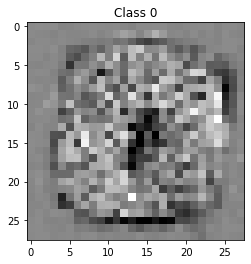

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


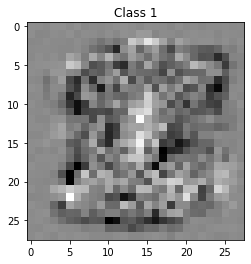

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


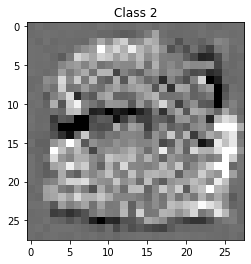

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


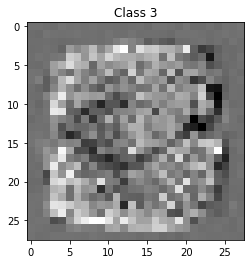

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


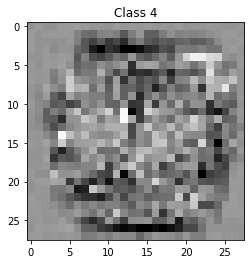

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


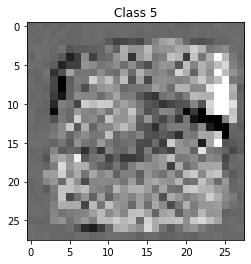

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


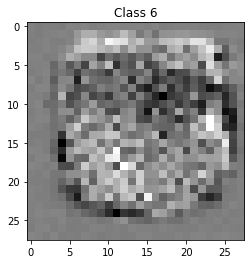

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


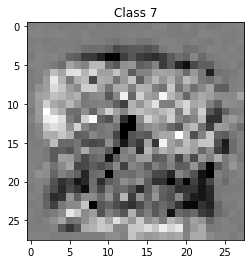

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


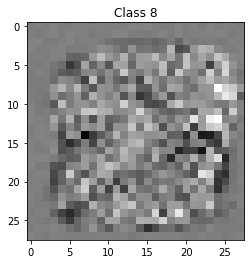

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


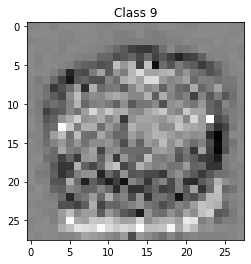

In [9]:
for parameter in network.parameters():
    for i in range(10):
        temp = torchvision.utils.make_grid(parameter[i].resize(28, 28))
        
        temp = temp / 2 + 0.5  # un-normalize
        temp_np = temp.numpy()
        
        plt.figure()
        plt.title("Class " + str(i))
        plt.imshow(np.transpose(temp_np, (1, 2, 0)))
        plt.show()
    
    break # we only need the first model parameter (weights)

In [10]:
limited_net = Net(num_inputs, num_outputs)
limited_optimizer = optim.SGD(network.parameters(), lr=lr)
# train only on 50 examples

def limited_train(epoch, train_loader):
    limited_net.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        
        if batch_idx >= 50:
            break
        
        data, target = Variable(data), Variable(target)
        limited_optimizer.zero_grad()
        output = limited_net(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        limited_optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


def limited_test(test_loader):
    limited_net.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        #data, target = Variable(data, volatile=True), Variable(target)
        output = limited_net(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        #test_loss += F.cross_entropy(output, target, sum=True).item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [11]:
# we shall use the same options

for i in range(1, epochs+1):
    limited_train(i, mnist_train_loader)

limited_test(mnist_test_loader)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.477914
Train Epoch: 2 [0/60000 (0%)]	Loss: 2.298790
Train Epoch: 3 [0/60000 (0%)]	Loss: 2.381729
Train Epoch: 4 [0/60000 (0%)]	Loss: 2.379549
Train Epoch: 5 [0/60000 (0%)]	Loss: 2.442194
Train Epoch: 6 [0/60000 (0%)]	Loss: 2.387542
Train Epoch: 7 [0/60000 (0%)]	Loss: 2.347443
Train Epoch: 8 [0/60000 (0%)]	Loss: 2.448014
Train Epoch: 9 [0/60000 (0%)]	Loss: 2.331684
Train Epoch: 10 [0/60000 (0%)]	Loss: 2.447169

Test set: Average loss: 2.4180, Accuracy: 801/10000 (8%)



# **Answer (3):**
create needed blocks of code (and results) below

In [12]:
class MultiLayerNet(nn.Module):
    def __init__(self, in_features, nb_classes, nb_hidden_layer,
                 hidden_size, act=nn.ReLU):
        
        super(MultiLayerNet, self).__init__()
        
        self.act = act()
        self.flatten = nn.Flatten()

        self.fc1 = nn.Linear(in_features, hidden_size)
        self.fcs = nn.ModuleList([])
        self.out = nn.Linear(hidden_size, nb_classes)
                
        self.linear_relu_stack = None
        

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [13]:
lr = 0.01

for i in range(4):
    print("Learning Rate: " + str(lr), end=2*'\n')
    
    network = MultiLayerNet(num_inputs, num_outputs, 1, 1000)
    optimizer = optim.SGD(network.parameters(), lr=lr)
    
    network.fcs.extend(nn.ModuleList([nn.Linear(1000, 1000)]))
    
    network.linear_relu_stack = nn.Sequential(
            network.fc1,
            nn.ReLU(),
            network.fcs[0],
            nn.ReLU(),
            network.out,
        )

    for i in range(1, epochs+1):
        train(i, mnist_train_loader)

    test(mnist_test_loader)
    
    lr *= 10

Learning Rate: 0.01

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.313349
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.882498
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.245380
Train Epoch: 1 [19200/60000 (32%)]	Loss: 1.049690
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.700510
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.465128
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.500638
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.338804
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.372697
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.266568
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.483423
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.524609
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.435974
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.390083
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.361803
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.370587
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.318096
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.256587
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.453621
Train Epoch: 2 [57600/60000 (96%)]	Loss: 

Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.091240
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.034538
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.102516
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.012494
Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.039955
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.020041
Train Epoch: 8 [0/60000 (0%)]	Loss: 0.018575
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.065407
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.005302
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.022672
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.006672
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.016113
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.021873
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.010793
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.018417
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.065813
Train Epoch: 9 [0/60000 (0%)]	Loss: 0.039123
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.022651
Train Epoch: 9 [12800/60000 (21%)]	Loss: 0.011998
Train Epoch: 9 [19200/60000 (32%)]	Loss: 0.009070
Train Epoch:

Train Epoch: 3 [57600/60000 (96%)]	Loss: nan
Train Epoch: 4 [0/60000 (0%)]	Loss: nan
Train Epoch: 4 [6400/60000 (11%)]	Loss: nan
Train Epoch: 4 [12800/60000 (21%)]	Loss: nan
Train Epoch: 4 [19200/60000 (32%)]	Loss: nan
Train Epoch: 4 [25600/60000 (43%)]	Loss: nan
Train Epoch: 4 [32000/60000 (53%)]	Loss: nan
Train Epoch: 4 [38400/60000 (64%)]	Loss: nan
Train Epoch: 4 [44800/60000 (75%)]	Loss: nan
Train Epoch: 4 [51200/60000 (85%)]	Loss: nan
Train Epoch: 4 [57600/60000 (96%)]	Loss: nan
Train Epoch: 5 [0/60000 (0%)]	Loss: nan
Train Epoch: 5 [6400/60000 (11%)]	Loss: nan
Train Epoch: 5 [12800/60000 (21%)]	Loss: nan
Train Epoch: 5 [19200/60000 (32%)]	Loss: nan
Train Epoch: 5 [25600/60000 (43%)]	Loss: nan
Train Epoch: 5 [32000/60000 (53%)]	Loss: nan
Train Epoch: 5 [38400/60000 (64%)]	Loss: nan
Train Epoch: 5 [44800/60000 (75%)]	Loss: nan
Train Epoch: 5 [51200/60000 (85%)]	Loss: nan
Train Epoch: 5 [57600/60000 (96%)]	Loss: nan
Train Epoch: 6 [0/60000 (0%)]	Loss: nan
Train Epoch: 6 [6400/60000 

# **Answer (4):**
create needed blocks of code (and results) below

In [14]:
dataset = 'cifar10'
lr = 0.01

In [15]:
class ConvNet(nn.Module):
    
    def __init__(self, in_features, nb_classes):
        super(ConvNet, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 16, (5, 5), (2, 2)) # with tanh
        self.conv2 = nn.Conv2d(16, 64, (3, 3), (1, 1)) # with tanh
        self.conv3 = nn.Conv2d(64, 64, (3, 3), (1, 1)) # with tanh
        self.fc1 = nn.Linear(16 * 64 * 64, 64) 
        self.first_linear = nn.Linear(64, 64)
        self.second_linear = nn.Linear(64, 10)
        
        self.linear_relu_stack = nn.Sequential(
            self.conv1,
            nn.ReLU(),
            self.conv2,
            nn.ReLU(),
            self.conv3,
            nn.ReLU(),
            nn.MaxPool2d(2),
#             nn.Flatten(),
            self.fc1,
            nn.ReLU(),
            self.first_linear,
            nn.ReLU(),
            self.second_linear
        )
        
        
    def forward(self, x):
#         x = F.relu(self.conv1(x)) 
#         x = F.relu(self.conv2(x)) 
#         x = F.relu(self.conv3(x)) 
#         # Run max pooling over x
#         x = F.max_pool2d(x, 2)
#         x = torch.flatten(x)
#         x = self.fc1(x)
#         # Pass data through first_linear
#         x = self.first_linear(x)
#         x = F.relu(x)
#         x = self.second_linear(x)
#         return x
        x = nn.Flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [17]:
epochs = 20 
network = ConvNet(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)
for i in range(1, epochs+1):
    train(i, mnist_train_loader)

res = test(mnist_test_loader)
# for i in range(epochs-1):
#     plt.plot((i, res[i]), (i + 1, res[i + 1]))
    
# plt.show()

TypeError: conv2d() received an invalid combination of arguments - got (Flatten, Parameter, Parameter, tuple, tuple, tuple, int), but expected one of:
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, tuple of ints padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: ([31;1mFlatten[0m, [31;1mParameter[0m, [31;1mParameter[0m, [31;1mtuple[0m, [31;1mtuple[0m, [31;1mtuple[0m, [32;1mint[0m)
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, str padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: ([31;1mFlatten[0m, [31;1mParameter[0m, [31;1mParameter[0m, [31;1mtuple[0m, [31;1mtuple[0m, [31;1mtuple[0m, [32;1mint[0m)
